In [79]:
import os
import pickle
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from PIL import Image
import math
from sklearn.metrics import accuracy_score,hamming_loss, accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from textwrap import wrap


from utils import KunischMetrics
from utils import KunischPruner
from utils import DataExplorer
from utils import KunischPlotter

In [131]:
files_dir = os.path.join('..', 'outputs', 'txt_files')
target = 'mr3'
target_name = '3-Match Ratio'

df_patterns = pd.read_csv(os.path.join(files_dir, 'resultados_C2AE_images.csv'), index_col=0)
df_alexnet = pd.read_csv(os.path.join(files_dir, 'resultados_C2AE_alexnet.csv'), index_col=0)

scores_patterns = df_patterns[target]
scores_alexnet = df_alexnet[target]
techniques = scores_patterns.index.values

In [132]:
plt.rcParams.update({'font.size': 11})
plt.rcParams['figure.dpi'] = 1000

blur_rain_ref_rot_crop1_elastic1 0.0 0.0
blur_rain_ref_rot_crop1_randaug1_elastic1 0.0 0.0
blur_rain_ref_rot_elastic1 0.0 0.0
ref 0.0 0.0
ref_rot 0.0 0.0
gausblur1 0.0 0.0026
rain_ref_rot_elastic1 0.0 0.0026
mtnblur 0.0 0.0052
rain_ref_rot 0.0 0.0052
randaug1 0.0 0.0052
rot 0.0 0.0052
rain 0.0 0.009
crop1 0.0 0.0103
blur 0.0 0.0206
elastic1 0.0 0.0245
base 0.0 0.0748


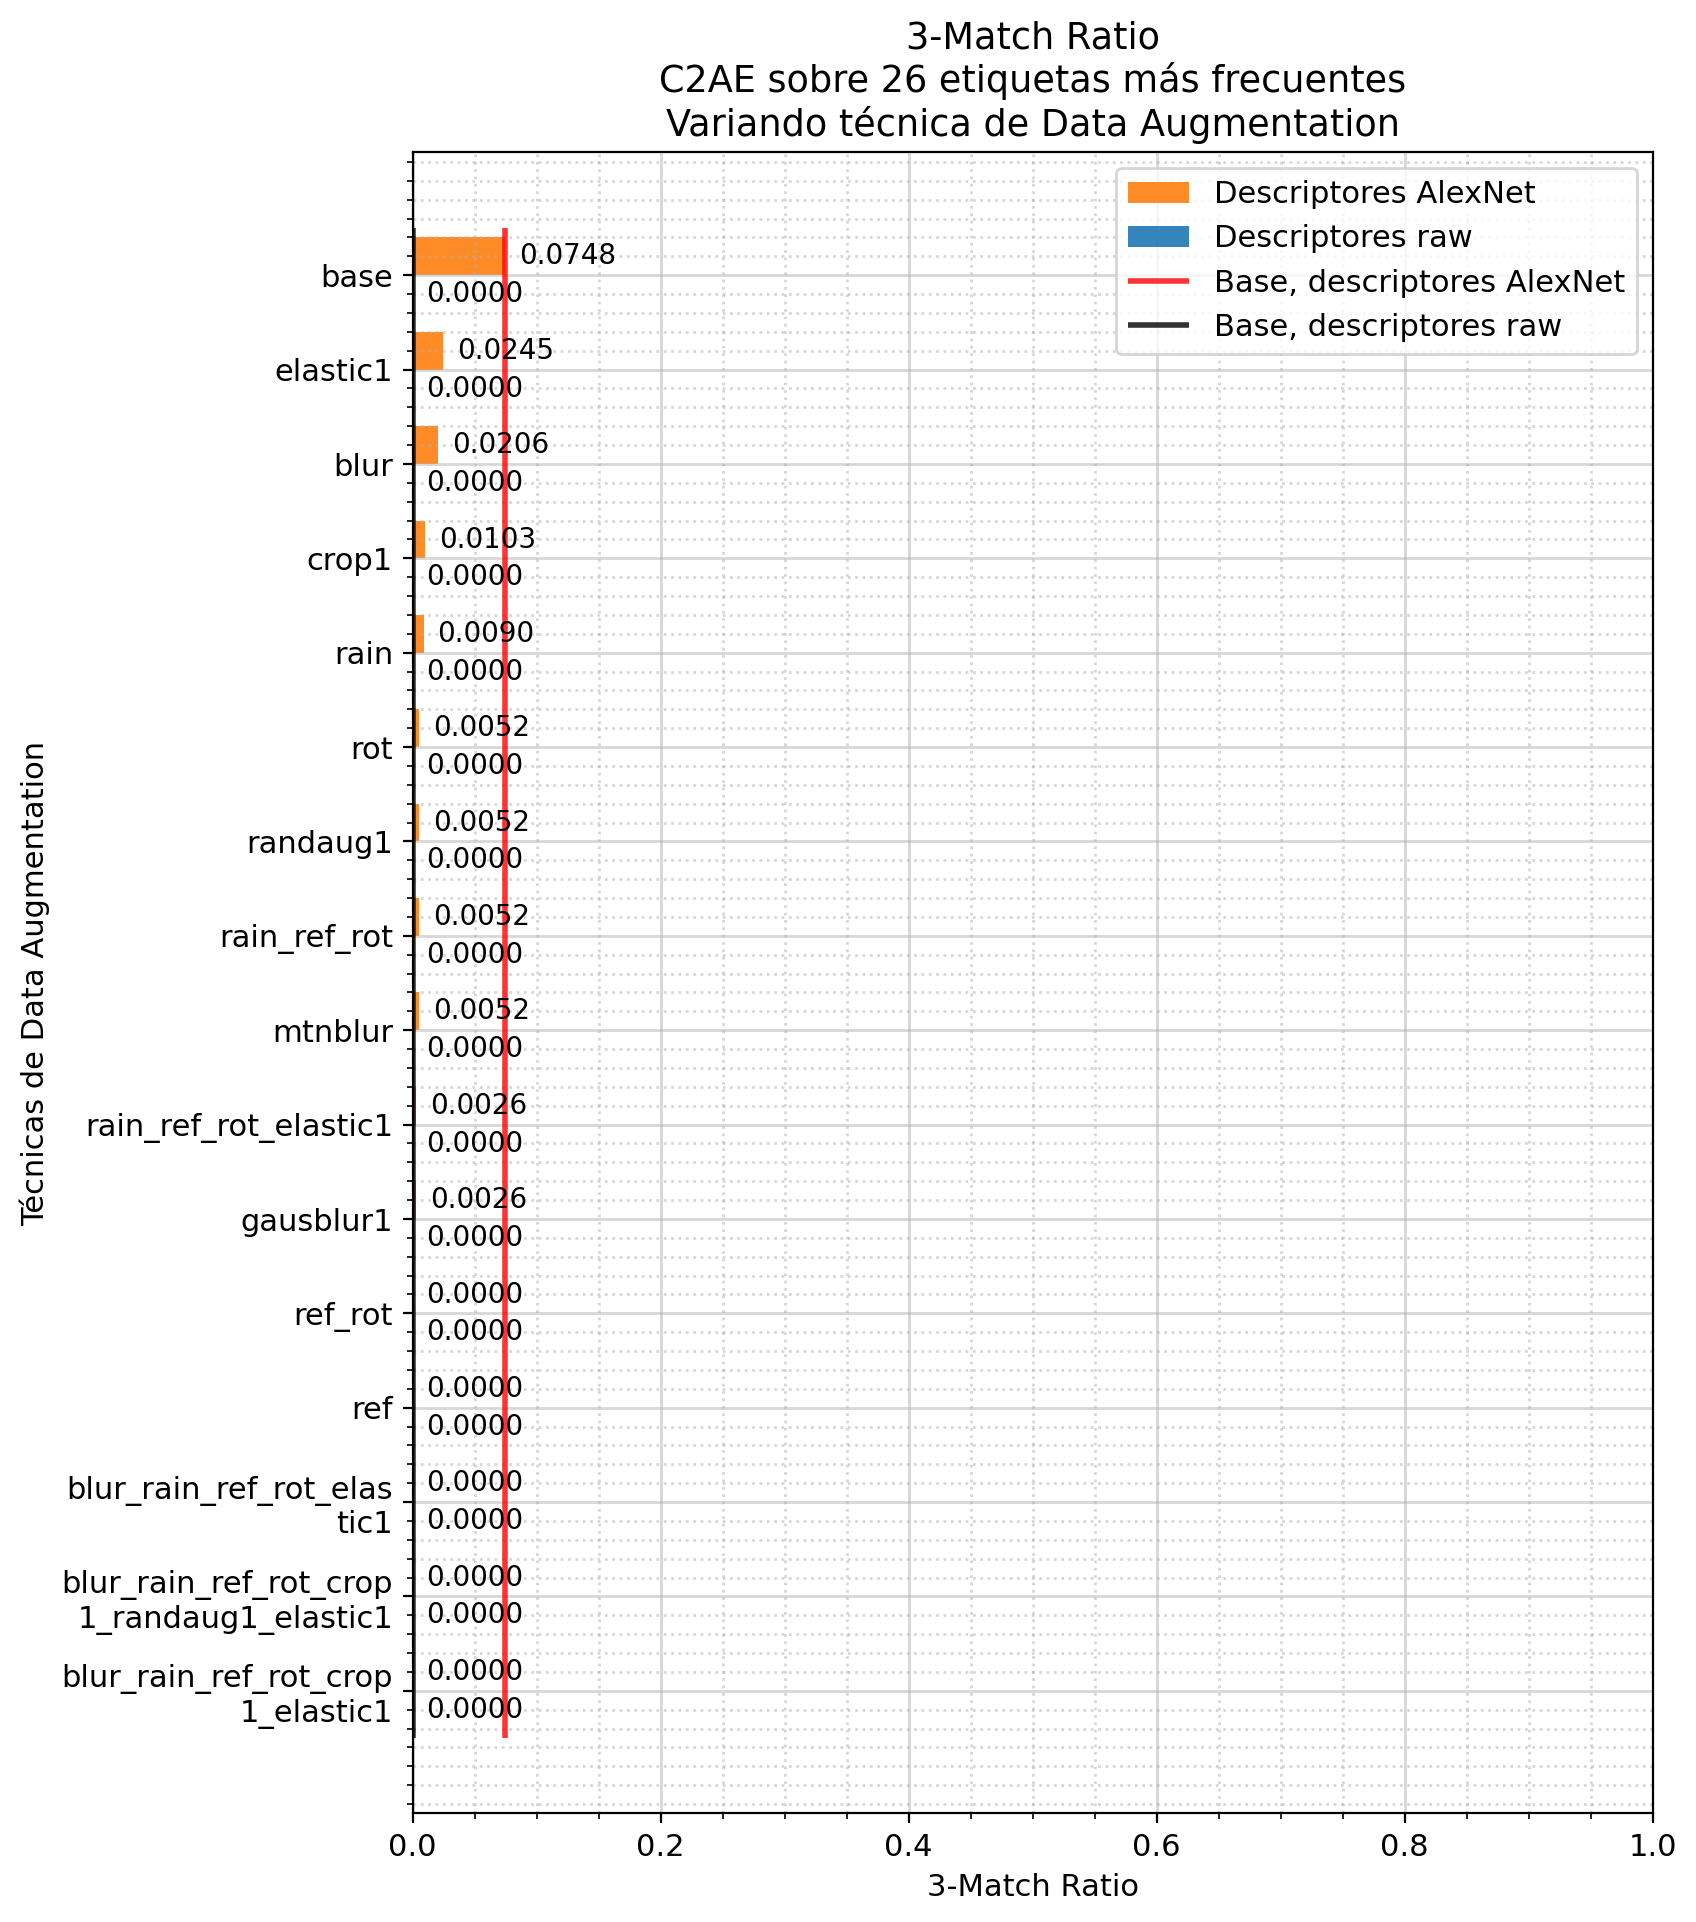

In [134]:
# ordenar 
s_pw, s_no_pw, techsorted = zip(*sorted(zip(scores_patterns, scores_alexnet, techniques)))

for i in range(0, len(techniques)):
    print(techsorted[i], s_pw[i], s_no_pw[i])
    
# wrap de las etiquetas cuando exceden cierto largo
techsorted = ['\n'.join(wrap(l, 22)) for l in techsorted]
x = np.arange(len(techsorted))

fig, ax = plt.subplots()
width = 0.4

b1 = ax.barh(x - width/2, s_pw, width, label = 'Descriptores raw', color='tab:blue', alpha=0.9)
b2 = ax.barh(x + width/2, s_no_pw, width, label = 'Descriptores AlexNet', color='tab:orange', alpha=0.9)
order = [3, 2, 0, 1]


ax.set_xlabel(target_name)
ax.set_ylabel('Técnicas de Data Augmentation')

ax.set_title(target_name + '\nC2AE sobre 26 etiquetas más frecuentes\nVariando técnica de Data Augmentation')

# linea horizontal marcando el resultado base no pw
index_base = techsorted.index('base')
plt.vlines(x=s_no_pw[index_base], color='red', linewidth=2, 
           ymin=-0.5, ymax=15.5, label = 'Base, descriptores AlexNet',
           alpha=0.8)
plt.vlines(x=s_pw[index_base], color='black', linewidth=2,
           ymin=-0.5, ymax=15.5, label = 'Base, descriptores raw',
           alpha=0.8)

# rotar labels del eje x
#plt.xticks(rotation=90)
fig.set_size_inches(8, 11)
fig.set_dpi(200)

ax.grid(which='both')
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='1', alpha=0.5)
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='1', alpha=0.5)

            
# legends en orden deseado
handles, ls = plt.gca().get_legend_handles_labels()
ax.legend([handles[idx] for idx in order],[ls[idx] for idx in order])
ax.bar_label(b1, fmt= '%.4f', padding=-40, color='white', size=10)
ax.bar_label(b2, fmt= '%.4f', padding=-40, color='white', size=10)
    
ax.set_yticks(x, techsorted)

ax.set_xlim(0, 1)
plt.show()

